In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [103]:
#load data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [104]:
df_train.head()

,customer_id,firstname,lastname,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,...,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency,primary_close_flag,final_close_flag
0,4814dfa2-45a8-46b9-8102-98ecbbec2d2a,Navya,Vasa,7,10,8,12,10,13,5,...,0.0,1.0,3.0,4.0,1,3,4,1,0,0
1,bb0abe41-cc89-4a1d-bb1c-48bd212ae00d,Azad,Warrior,5,15,6,7,6,9,1,...,3.0,3.0,3.0,4.0,1,3,4,1,0,0
2,edfd1a62-05da-4cfd-b8ae-521f05f0fd5f,Piya,Jha,1,15,17,8,5,9,1,...,3.0,3.0,3.0,4.0,1,3,4,1,0,0
3,3eaa4c2a-2316-48f4-b1b0-4aafe2286630,Rhea,Varma,11,7,2,11,13,14,8,...,3.0,3.0,3.0,4.0,1,2,4,1,0,0
4,c9a73239-baae-40eb-8855-dab07767ea86,Sahil,Dave,12,14,9,8,11,6,13,...,3.0,3.0,3.0,4.0,1,3,4,1,0,0


In [105]:
df_train.shape

(1106674, 62)

In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106674 entries, 0 to 1106673
Data columns (total 62 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   customer_id                         1106674 non-null  object 
 1   firstname                           1106674 non-null  object 
 2   lastname                            1106674 non-null  object 
 3   record_number                       1106674 non-null  int64  
 4   days_since_opened                   1106674 non-null  int64  
 5   days_since_confirmed                1106674 non-null  int64  
 6   primary_term                        1106674 non-null  int64  
 7   final_term                          1106674 non-null  int64  
 8   days_till_primary_close             1106674 non-null  int64  
 9   days_till_final_close               1106674 non-null  int64  
 10  loans_credit_limit                  1106674 non-null  int64  
 11  loans_next_

In [107]:
df_train.describe()

,record_number,days_since_opened,days_since_confirmed,primary_term,final_term,days_till_primary_close,days_till_final_close,loans_credit_limit,loans_next_payment_summary,loans_outstanding_balance,...,encoded_payment_21,encoded_payment_22,encoded_payment_23,encoded_payment_24,encoded_loans_account_holder_type,encoded_loans_credit_status,encoded_loans_credit_type,encoded_loans_account_currency,primary_close_flag,final_close_flag
count,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,...,1.069126e+06,1.069519e+06,1.070131e+06,1.070629e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06,1.106674e+06
mean,9.149727e+00,9.433967e+00,8.231377e+00,8.408147e+00,8.282763e+00,7.273099e+00,8.193988e+00,9.715922e+00,2.332612e+00,2.993031e+00,...,2.328069e+00,2.359353e+00,2.393023e+00,3.529236e+00,1.029407e+00,2.758336e+00,3.599215e+00,1.001480e+00,1.282708e-01,1.910454e-01
std,5.746106e+00,5.747728e+00,4.776280e+00,5.282007e+00,4.565543e+00,5.094787e+00,4.321941e+00,5.844795e+00,1.247430e+00,6.411320e-01,...,1.238293e+00,1.217475e+00,1.193804e+00,1.081633e+00,2.931483e-01,4.686307e-01,1.011067e+00,4.470347e-02,3.343913e-01,3.931249e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00,5.000000e+00,2.000000e+00,5.000000e+00,5.000000e+00,2.000000e+00,3.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,9.000000e+00,1.000000e+01,9.000000e+00,8.000000e+00,8.000000e+00,7.000000e+00,9.000000e+00,1.000000e+01,2.000000e+00,3.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,1.300000e+01,1.400000e+01,1.200000e+01,1.400000e+01,1.200000e+01,1.200000e+01,1.100000e+01,1.500000e+01,2.000000e+00,3.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,4.700000e+01,1.900000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.500000e+01,1.900000e+01,6.000000e+00,5.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,6.000000e+00,7.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00


In [108]:
# check for missing values
df_train.isnull().sum()

customer_id                       0
firstname                         0
lastname                          0
record_number                     0
days_since_opened                 0
                                 ..
encoded_loans_credit_status       0
encoded_loans_credit_type         0
encoded_loans_account_currency    0
primary_close_flag                0
final_close_flag                  0
Length: 62, dtype: int64

In [109]:
cols=['customer_id','firstname','lastname']
df_train.drop(cols,axis=1,inplace=True)
df_test.drop(cols,axis=1,inplace=True)

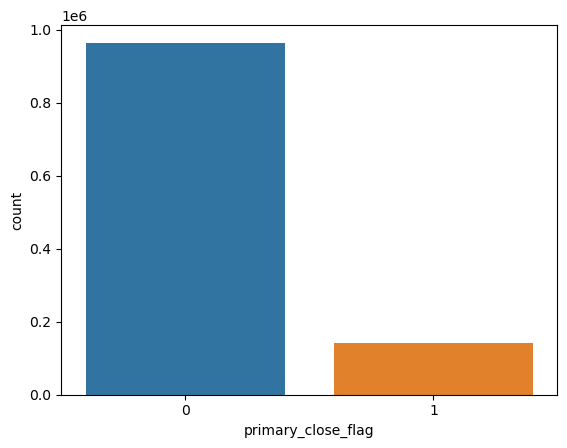

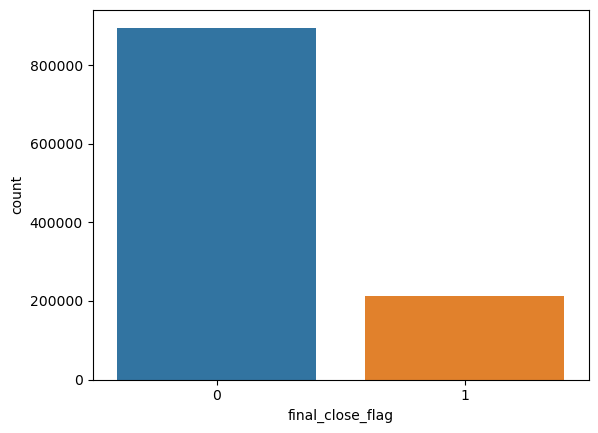

In [110]:
# visualize the count of target labels
T_cols=['primary_close_flag','final_close_flag']

for col in df_train[T_cols]:
    sns.countplot(x=col,data=df_train)
    plt.show()
    



In [111]:
encoded_features = ['encoded_payment_' + str(i) for i in range(25)]

#drop the encoded features
df_train.drop(encoded_features,axis=1,inplace=True)


In [112]:

df_test.drop(encoded_features,axis=1,inplace=True)

In [113]:
#label encoding

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Iterate through each feature in df_train

for col in df_train.columns:
    # If the feature is categorical, convert to numeric
    if df_train[col].dtype == 'object':
        df_train[col] = le.fit_transform(df_train[col])
    else:
        pass

# Iterate through each feature in df_test

for col in df_test.columns:
    # If the feature is categorical, convert to numeric
    if df_test[col].dtype == 'object':
        df_test[col] = le.fit_transform(df_test[col])
    else:
        pass

In [114]:
df_train.dtypes

record_number                         int64
days_since_opened                     int64
days_since_confirmed                  int64
primary_term                          int64
final_term                            int64
days_till_primary_close               int64
days_till_final_close                 int64
loans_credit_limit                    int64
loans_next_payment_summary            int64
loans_outstanding_balance             int64
loans_max_overdue_amount              int64
loans_credit_cost_rate                int64
loans_within_5_days                   int64
loans_within_5_to_30_days             int64
loans_within_30_to_60_days            int64
loans_within_60_to_90_days            int64
loans_over_90_days                    int64
is_zero_loans_within_5_days           int32
is_zero_loans_within_5_to_30_days     int32
is_zero_loans_within_30_to_60_days    int32
is_zero_loans_within_60_to_90_days    int32
is_zero_loans_over_90_days            int32
utilization                     

In [115]:
X=df_train.drop(['primary_close_flag','final_close_flag'],axis=1)
y=df_train[T_cols]


In [116]:
y

,primary_close_flag,final_close_flag
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1106669,0,0
1106670,0,0
1106671,0,0
1106672,0,0


In [117]:
# check for missing values in X
X.isnull().sum()

record_number                         0
days_since_opened                     0
days_since_confirmed                  0
primary_term                          0
final_term                            0
days_till_primary_close               0
days_till_final_close                 0
loans_credit_limit                    0
loans_next_payment_summary            0
loans_outstanding_balance             0
loans_max_overdue_amount              0
loans_credit_cost_rate                0
loans_within_5_days                   0
loans_within_5_to_30_days             0
loans_within_30_to_60_days            0
loans_within_60_to_90_days            0
loans_over_90_days                    0
is_zero_loans_within_5_days           0
is_zero_loans_within_5_to_30_days     0
is_zero_loans_within_30_to_60_days    0
is_zero_loans_within_60_to_90_days    0
is_zero_loans_over_90_days            0
utilization                           0
over_limit_count                      0
max_over_limit_count                  0


In [118]:

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)
X_pca = pca.transform(X)


In [119]:

test_pca = pca.transform(df_test)

In [120]:
%pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


In [121]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca,y, test_size = 0.25, random_state = 42)

In [122]:
# import classifiers
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [123]:
y_train['primary_close_flag']

794887    0
182856    0
212698    0
637855    0
857272    1
         ..
110268    0
259178    0
131932    0
671155    0
121958    0
Name: primary_close_flag, Length: 830005, dtype: int64

In [124]:
# undersample the majority class
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train['primary_close_flag'])

# oversample the minority class
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_res, y_train_res)


In [125]:

# gradient boosting classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_res, y_train_res)


GradientBoostingClassifier(random_state=42)

In [126]:
# random forest classifier
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(X_train_res, y_train_res)


In [ ]:

# xgboost classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_res, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [72]:

# predict on test data
y_pred_gbc = gbc.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_xgb = xgb.predict(X_test)


In [73]:

# accuracy score
print('Accuracy score for Gradient Boosting Classifier is:', accuracy_score(y_test['primary_close_flag'], y_pred_gbc))
print('Accuracy score for Random Forest Classifier is:', accuracy_score(y_test['primary_close_flag'], y_pred_rfc))
print('Accuracy score for XGBoost Classifier is:', accuracy_score(y_test['primary_close_flag'], y_pred_xgb))

Accuracy score for Gradient Boosting Classifier is: 0.8799359523473899
Accuracy score for Random Forest Classifier is: 0.9187838174858767
Accuracy score for XGBoost Classifier is: 0.9004369842663977


In [74]:

# confusion matrix
print('Confusion Matrix for Gradient Boosting Classifier is:', confusion_matrix(y_test['primary_close_flag'], y_pred_gbc))
print('Confusion Matrix for Random Forest Classifier is:', confusion_matrix(y_test['primary_close_flag'], y_pred_rfc))
print('Confusion Matrix for XGBoost Classifier is:', confusion_matrix(y_test['primary_close_flag'], y_pred_xgb))


Confusion Matrix for Gradient Boosting Classifier is: [[208905  32286]
 [   932  34546]]
Confusion Matrix for Random Forest Classifier is: [[219538  21653]
 [   817  34661]]
Confusion Matrix for XGBoost Classifier is: [[214535  26656]
 [   890  34588]]


In [75]:

# classification report
print('Classification Report for Gradient Boosting Classifier is:', classification_report(y_test['primary_close_flag'], y_pred_gbc))
print('Classification Report for Random Forest Classifier is:', classification_report(y_test['primary_close_flag'], y_pred_rfc))
print('Classification Report for XGBoost Classifier is:', classification_report(y_test['primary_close_flag'], y_pred_xgb))


Classification Report for Gradient Boosting Classifier is:               precision    recall  f1-score   support

           0       1.00      0.87      0.93    241191
           1       0.52      0.97      0.68     35478

    accuracy                           0.88    276669
   macro avg       0.76      0.92      0.80    276669
weighted avg       0.93      0.88      0.89    276669

Classification Report for Random Forest Classifier is:               precision    recall  f1-score   support

           0       1.00      0.91      0.95    241191
           1       0.62      0.98      0.76     35478

    accuracy                           0.92    276669
   macro avg       0.81      0.94      0.85    276669
weighted avg       0.95      0.92      0.93    276669

Classification Report for XGBoost Classifier is:               precision    recall  f1-score   support

           0       1.00      0.89      0.94    241191
           1       0.56      0.97      0.72     35478

    accuracy       

In [76]:

# roc auc score
print('ROC AUC score for Gradient Boosting Classifier is:', roc_auc_score(y_test['primary_close_flag'], y_pred_gbc))
print('ROC AUC score for Random Forest Classifier is:', roc_auc_score(y_test['primary_close_flag'], y_pred_rfc))
print('ROC AUC score for XGBoost Classifier is:', roc_auc_score(y_test['primary_close_flag'], y_pred_xgb))


ROC AUC score for Gradient Boosting Classifier is: 0.9199347414003416
ROC AUC score for Random Forest Classifier is: 0.9435981605539233
ROC AUC score for XGBoost Classifier is: 0.9321979056153524


In [77]:

# roc curve
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test['primary_close_flag'], y_pred_gbc)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test['primary_close_flag'], y_pred_rfc)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test['primary_close_flag'], y_pred_xgb)


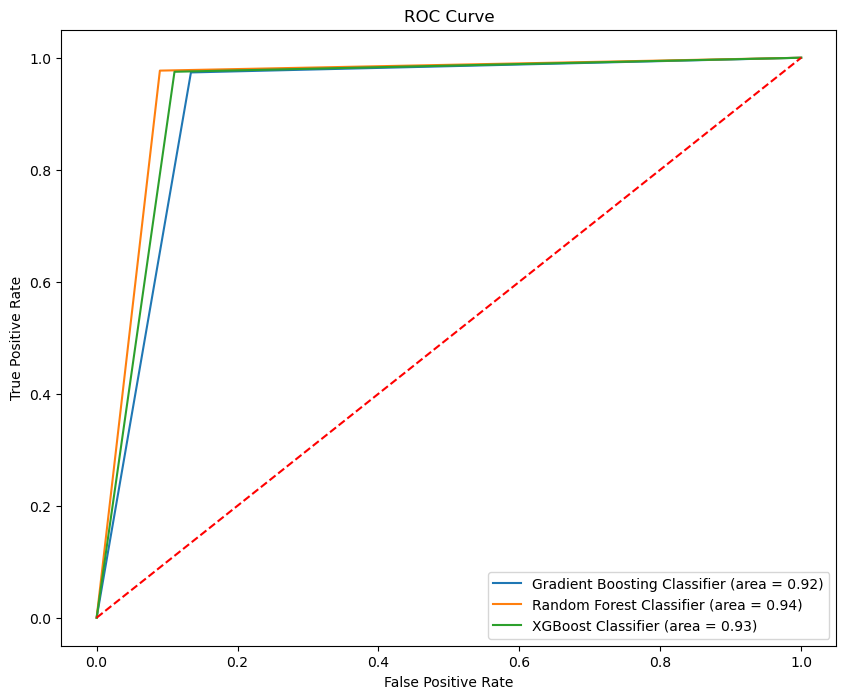

In [78]:

# plot roc curve
plt.figure(figsize=(10,8))
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting Classifier (area = %0.2f)' % roc_auc_score(y_test['primary_close_flag'], y_pred_gbc))
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest Classifier (area = %0.2f)' % roc_auc_score(y_test['primary_close_flag'], y_pred_rfc))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost Classifier (area = %0.2f)' % roc_auc_score(y_test['primary_close_flag'], y_pred_xgb))
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('ROC Curve.png')
plt.show()


In [81]:
# predict on test data
y_pred_rfc = rfc.predict(test_pca)


# store the predictions in model_predictions.csv

df_test['primary_close_flag'] = y_pred_rfc



In [82]:
df_test['primary_close_flag'].value_counts()

0    377830
1     96459
Name: primary_close_flag, dtype: int64

In [ ]:
df_test.shape

In [83]:
rus = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train['final_close_flag'])

# oversample the minority class
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_res, y_train_res)

In [84]:
# gradient boosting classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=42)

In [85]:
# random forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_res, y_train_res)

RandomForestClassifier(random_state=42)

In [86]:

# xgboost classifier
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train_res, y_train_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [87]:

# predict on test data
y_pred_gbc = gbc.predict(X_test)
y_pred_rfc = rfc.predict(X_test)
y_pred_xgb = xgb.predict(X_test)


In [88]:

# accuracy score
print('Accuracy score for Gradient Boosting Classifier is:', accuracy_score(y_test['final_close_flag'], y_pred_gbc))
print('Accuracy score for Random Forest Classifier is:', accuracy_score(y_test['final_close_flag'], y_pred_rfc))
print('Accuracy score for XGBoost Classifier is:', accuracy_score(y_test['final_close_flag'], y_pred_xgb))

Accuracy score for Gradient Boosting Classifier is: 0.7370106517173951
Accuracy score for Random Forest Classifier is: 0.829182163523922
Accuracy score for XGBoost Classifier is: 0.7623405585736024


In [89]:
# confusion matrix
print('Confusion Matrix for Gradient Boosting Classifier is:', confusion_matrix(y_test['final_close_flag'], y_pred_gbc))
print('Confusion Matrix for Random Forest Classifier is:', confusion_matrix(y_test['final_close_flag'], y_pred_rfc))
print('Confusion Matrix for XGBoost Classifier is:', confusion_matrix(y_test['final_close_flag'], y_pred_xgb))


Confusion Matrix for Gradient Boosting Classifier is: [[163735  60104]
 [ 12657  40173]]
Confusion Matrix for Random Forest Classifier is: [[185940  37899]
 [  9361  43469]]
Confusion Matrix for XGBoost Classifier is: [[169439  54400]
 [ 11353  41477]]


In [90]:

# classification report
print('Classification Report for Gradient Boosting Classifier is:', classification_report(y_test['final_close_flag'], y_pred_gbc))
print('Classification Report for Random Forest Classifier is:', classification_report(y_test['final_close_flag'], y_pred_rfc))
print('Classification Report for XGBoost Classifier is:', classification_report(y_test['final_close_flag'], y_pred_xgb))


Classification Report for Gradient Boosting Classifier is:               precision    recall  f1-score   support

           0       0.93      0.73      0.82    223839
           1       0.40      0.76      0.52     52830

    accuracy                           0.74    276669
   macro avg       0.66      0.75      0.67    276669
weighted avg       0.83      0.74      0.76    276669

Classification Report for Random Forest Classifier is:               precision    recall  f1-score   support

           0       0.95      0.83      0.89    223839
           1       0.53      0.82      0.65     52830

    accuracy                           0.83    276669
   macro avg       0.74      0.83      0.77    276669
weighted avg       0.87      0.83      0.84    276669

Classification Report for XGBoost Classifier is:               precision    recall  f1-score   support

           0       0.94      0.76      0.84    223839
           1       0.43      0.79      0.56     52830

    accuracy       

In [91]:

# roc auc score
print('ROC AUC score for Gradient Boosting Classifier is:', roc_auc_score(y_test['final_close_flag'], y_pred_gbc))
print('ROC AUC score for Random Forest Classifier is:', roc_auc_score(y_test['final_close_flag'], y_pred_rfc))
print('ROC AUC score for XGBoost Classifier is:', roc_auc_score(y_test['final_close_flag'], y_pred_xgb))


ROC AUC score for Gradient Boosting Classifier is: 0.7459528962366501
ROC AUC score for Random Forest Classifier is: 0.8267476757772168
ROC AUC score for XGBoost Classifier is: 0.7710356695517638


In [92]:

# roc curve
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test['final_close_flag'], y_pred_gbc)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(y_test['final_close_flag'], y_pred_rfc)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test['final_close_flag'], y_pred_xgb)


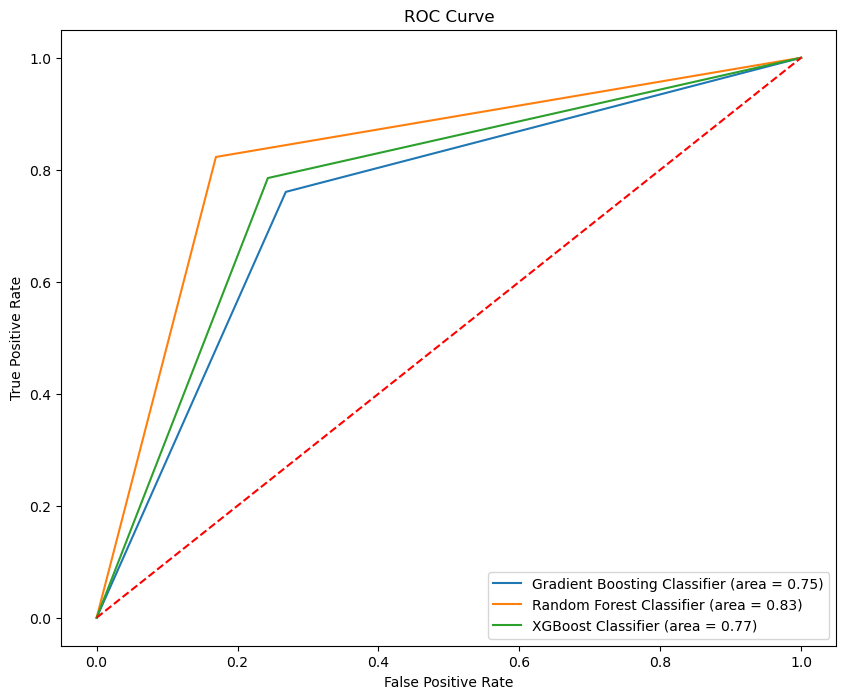

In [93]:

# plot roc curve
plt.figure(figsize=(10,8))
plt.plot(fpr_gbc, tpr_gbc, label='Gradient Boosting Classifier (area = %0.2f)' % roc_auc_score(y_test['final_close_flag'], y_pred_gbc))
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest Classifier (area = %0.2f)' % roc_auc_score(y_test['final_close_flag'], y_pred_rfc))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost Classifier (area = %0.2f)' % roc_auc_score(y_test['final_close_flag'], y_pred_xgb))
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('ROC_ final_ Curve.png')
plt.show()


In [94]:
# predict on test data
y_pred_rfc = rfc.predict(test_pca)

df_test['final_close_flag'] = y_pred_rfc

df_test['final_close_flag'].value_counts()


df_test.to_csv('model_predictions.csv',index=False)

In [95]:
df_test['final_close_flag'].value_counts()

0    334970
1    139319
Name: final_close_flag, dtype: int64

In [99]:
# submission file
sub=pd.read_csv('model_predictions.csv')

#keep only the last two columns

sub=sub.iloc[:,-2:]

sub.head()


,primary_close_flag,final_close_flag
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0
